## Analyzing spatial data in Python: Schools in Malika, Dakar, Senegal

Today, i will anaylyze some school point location in Malika. The goal is to visualize these schools in Malika and see if some of them are within the shape of Malika. I will also show how to check distance between different schools together

I will load some school data that i extracted from google earth pro, saving my research to kml file and opened it with microsoft excel then clean up my data, take the needed part only and load it here with pandas.

In [290]:
import pandas as pd
import geopandas
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [291]:
some_schools_in_Malika = pd.read_excel('D:\Research\PROJECT\pyexeriences\Geospatial experiences\data\some_schools_in_malika.xlsx')


In [292]:
some_schools_in_Malika.head()

,school_name,addresses,coordinates,phone_contacts
0,"Institut Biblique, Malika Sénégal","Malika, Senegal","-17.337383, 14.796181",NaN
1,Elementary School Malika Plage,"Malika, Senegal","-17.337383, 14.796181",NaN
2,Keur Serigne Touba,"Malika Plage, Senegal","-17.3363701, 14.7963104",+221 76 002 83 91
3,Gs Cholaye,"Malika plage, Malika, Senegal","-17.3376452, 14.8007407",+221 77 381 32 10
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal","-17.338977, 14.785753",NaN


In [293]:
len(some_schools_in_Malika)

30

I will check which address is not containing Malika, but that doesn't mean it's not in Malika.

In [294]:
malika_not_in_address = [i for i in some_schools_in_Malika['addresses'] if "Malika" not in i]

In [295]:
malika_not_in_address

['Dakar, Senegal',
 'Dakar, Senegal',
 'Unnamed Road, Senegal',
 'Unnamed Road, Senegal',
 'Dakar, Senegal',
 'keur massar, Sénégal P.A, Senegal',
 'Ecole Unité 17, Keur Massar, Senegal',
 'Senegal',
 'Dakar, Senegal',
 'Dakar, Senegal',
 'Keur Massar, Senegal',
 'Keur Massar, Senegal',
 'Dakar, Senegal',
 'Unnamed Road, Dakar, Senegal',
 'Keur Massar, Senegal',
 'Senegal',
 'Dakar, Senegal',
 'Senegal',
 'Unnamed Road, Senegal']

In [296]:
len(malika_not_in_address)

19

We have 19 addresses that are already in 'Keur Massar', a neighbor city of Malika. Malika and Keur Massar are linked together directly (no natural border between them).

As i live in Malika since almost 2002 or little later, i think the real Malika is starting almost from 'Tali bukhonk' (means a red road) to down of 'Malika Montagne'. I will try to keep the border geometries to these two locations. Any school out of these two points will be considered out of Malika

In [297]:
# Checking the data type of our data
some_schools_in_Malika.dtypes

school_name       object
addresses         object
coordinates       object
phone_contacts    object
dtype: object

In [298]:
# Remove any space within the columns
some_schools_in_Malika.columns = some_schools_in_Malika.columns.str.strip()
some_schools_in_Malika.columns

Index(['school_name', 'addresses', 'coordinates', 'phone_contacts'], dtype='object')

In [299]:
some_schools_in_Malika[['longitude', 'latitude']] = some_schools_in_Malika['coordinates'].str.split(', ', expand=True)

In [300]:
some_schools_in_Malika.head()

,school_name,addresses,coordinates,phone_contacts,longitude,latitude
0,"Institut Biblique, Malika Sénégal","Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181
1,Elementary School Malika Plage,"Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181
2,Keur Serigne Touba,"Malika Plage, Senegal","-17.3363701, 14.7963104",+221 76 002 83 91,-17.3363701,14.7963104
3,Gs Cholaye,"Malika plage, Malika, Senegal","-17.3376452, 14.8007407",+221 77 381 32 10,-17.3376452,14.8007407
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal","-17.338977, 14.785753",NaN,-17.338977,14.785753


We have latitude and longitude in our data now, let's see

In [301]:
some_schools_in_Malika.columns

Index(['school_name', 'addresses', 'coordinates', 'phone_contacts',
       'longitude', 'latitude'],
      dtype='object')

In [302]:
some_schools_in_Malika.to_excel('schools_in_malika_with_latlon.xlsx')

Moving to create a spatial data 

In [303]:
geom_schools = geopandas.GeoDataFrame(some_schools_in_Malika, geometry = geopandas.points_from_xy(some_schools_in_Malika.longitude, some_schools_in_Malika.latitude))

In [304]:
geom_schools.head()

,school_name,addresses,coordinates,phone_contacts,longitude,latitude,geometry
0,"Institut Biblique, Malika Sénégal","Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
1,Elementary School Malika Plage,"Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
2,Keur Serigne Touba,"Malika Plage, Senegal","-17.3363701, 14.7963104",+221 76 002 83 91,-17.3363701,14.7963104,POINT (-17.33637 14.79631)
3,Gs Cholaye,"Malika plage, Malika, Senegal","-17.3376452, 14.8007407",+221 77 381 32 10,-17.3376452,14.8007407,POINT (-17.33765 14.80074)
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal","-17.338977, 14.785753",NaN,-17.338977,14.785753,POINT (-17.33898 14.78575)


In [305]:
geom_schools.columns

Index(['school_name', 'addresses', 'coordinates', 'phone_contacts',
       'longitude', 'latitude', 'geometry'],
      dtype='object')

In [306]:
# Delete some uncessary columns like coordinates since we have the lat, lon and geometry
geom_schools.drop('coordinates', axis=1, inplace=True)

In [307]:
geom_schools.head()

,school_name,addresses,phone_contacts,longitude,latitude,geometry
0,"Institut Biblique, Malika Sénégal","Malika, Senegal",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
1,Elementary School Malika Plage,"Malika, Senegal",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
2,Keur Serigne Touba,"Malika Plage, Senegal",+221 76 002 83 91,-17.3363701,14.7963104,POINT (-17.33637 14.79631)
3,Gs Cholaye,"Malika plage, Malika, Senegal",+221 77 381 32 10,-17.3376452,14.8007407,POINT (-17.33765 14.80074)
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal",NaN,-17.338977,14.785753,POINT (-17.33898 14.78575)


<AxesSubplot:>

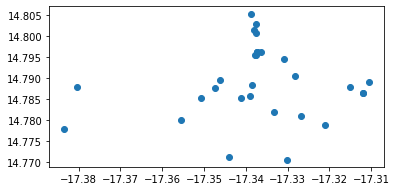

In [308]:
# Plotting our geometry point
geom_schools.plot()

In [309]:
# save to shapefile, 
geom_schools.to_file('D:\Research\PROJECT\pyexeriences\Geospatial experiences\data\schools_in_malika')

The saved file is about a folder containing 4 files: .cpg, .dbf, .shp, .shx

We stored our data to a shapefile, let's load it back here and see:

In [310]:
s = geopandas.read_file('D:\Research\PROJECT\pyexeriences\Geospatial experiences\data\schools_in_malika\schools_in_malika.shp')

In [311]:
s.head()

,school_nam,addresses,phone_cont,longitude,latitude,geometry
0,"Institut Biblique, Malika Sénégal","Malika, Senegal",None,-17.337383,14.796181,POINT (-17.33738 14.79618)
1,Elementary School Malika Plage,"Malika, Senegal",None,-17.337383,14.796181,POINT (-17.33738 14.79618)
2,Keur Serigne Touba,"Malika Plage, Senegal",+221 76 002 83 91,-17.3363701,14.7963104,POINT (-17.33637 14.79631)
3,Gs Cholaye,"Malika plage, Malika, Senegal",+221 77 381 32 10,-17.3376452,14.8007407,POINT (-17.33765 14.80074)
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal",None,-17.338977,14.785753,POINT (-17.33898 14.78575)


In [312]:
type(s)

geopandas.geodataframe.GeoDataFrame

## Point in Polygon

I will extract the Polygon of Malika and see which schools are lying within the polygon and which are not

In [313]:
# TRYING TO GET POLYGON OF MALIKA WITH GEOPANDAS
ms = geopandas.tools.geocode('Malika, Senegal', provider= 'Nominatim', user_agent= 'exercice')

In [314]:
ms

,geometry,address
0,POINT (-17.33760 14.80148),"Malika, Dakar, 20896, Sénégal"


We have Point geometry type here, i would like to have a Polygon. I will later try with osmnx and if i don't get it, then i will manually extract the geometries with google earth pro

<AxesSubplot:>

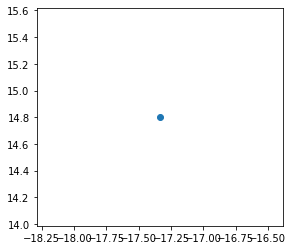

In [315]:
ms.plot()

In [316]:
# Extracting polygon of Malika with osmnx library but not easy
#shape_malika = ox.geocode_to_gdf('Malika Senegal')

In [317]:
malika_point = Point(-17.33721052118471, 14.798335688964817) 
# This code can be done through ms variable created above
# points = ms.geometry

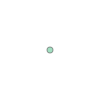

In [318]:
malika_point

In [319]:
# Here i will create a Polygon of Malika within 1000m (1km) between 'Ben Barak' and 'Keur Massar'. The polygon here is about a circle 
buffer_malika = Polygon(malika_point.buffer(1000))

In [320]:
# Check if Malika point we created earlier is in the buffered Polygon
buffer_malika.contains(malika_point)

True

In [333]:
# Check if my actual location where i'm in Malika is within the Polygon
actual_location = Point(-17.336645000001983, 14.792184253470058) # The point i copied it from google map

In [322]:
buffer_malika.contains(actual_location)

True

In [332]:
buffer_malika.area

3136548.4905459387

In [331]:
buffer_malika.geom_type

'Polygon'

### Another method to buffer a location or to create a Polygon of an area

In [330]:
 from functools import partial
 import pyproj
 from shapely.ops import transform

In [329]:
proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')

In [328]:
def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

In [327]:
poly_malika = geodesic_point_buffer(14.798335688964817, -17.33721052118471, 1)


In [326]:
poly_malika = Polygon(poly_malika)

In [325]:
type(poly_malika)

shapely.geometry.polygon.Polygon

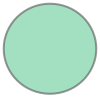

In [324]:
poly_malika

In [289]:
# Checking those points (schools) within the Polygon of Malika. Note: The polygon of Malika is just a buffer of 1km, around 1000m
within_points = [geom_schools.geometry[i].within(poly_malika) for i in range(geom_schools.geometry.count())]


In [288]:
# Checking the True of schools within our polygon
tr = [i for i in within_points if i == True]
len(tr)

11

In [287]:
# Checking the point that are not within the polygon, the false ones
fa = [i for i in within_points if i == False]
len(fa)

19

There are 11 point locations (schools) that are in 'Malika' area and the rest are in the neighbor municipalities like 'Keur Massar', 'Yeumbeul', 'Keur Massar'...


In [ ]:
only_malika = geom_schools[geom_schools['addresses'].str.contains('Malika')]
#only_malika.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
only_malika.plot(ax=ax, facecolor='black');
geom_schools.plot(ax=ax, facecolor='yellow');
#data.plot(ax=ax, color='blue', markersize=5);
plt.tight_layout();

In [ ]:
geopandas.GeoDataFrame(poly_malika.coords)

Malika is one of municipalities of Pikine (a department of Dakar). Let's extract Dakar region and map the schools on it


In [184]:
dakar_region = ox.graph_from_place('Dakar Senegal')

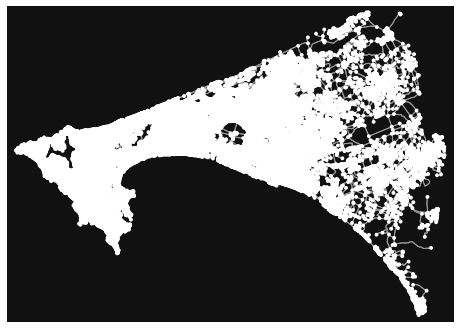

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [185]:
ox.plot_graph(dakar_region)

This is a graph shape of Dakar, the capital city of Senegal, Malika is one of the district in this region. Let's map all the schools in this city

In [211]:
city = ox.geocode_to_gdf('Malika village, Pikine, Dakar, Senegal')


In [212]:
city

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-17.34103 14.78713, -17.34094 14.787...","Mosquée Malika Sud, Route de Malika, Malika, D...",14.787283,14.787086,-17.340798,-17.341033


<AxesSubplot:>

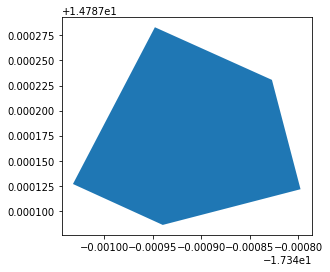

In [213]:
city.plot()

In [214]:
city.area

<ipython-input-214-2f155db52f9a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city.area


0    2.891240e-08
dtype: float64

In [215]:
city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The place name is Mosquee de Malika, it’s just normal because it's not well delimited geographically. Just put in mind it's an approximation

In [260]:
g = ox.graph_from_point([14.797673115014163, -17.337297062427563])


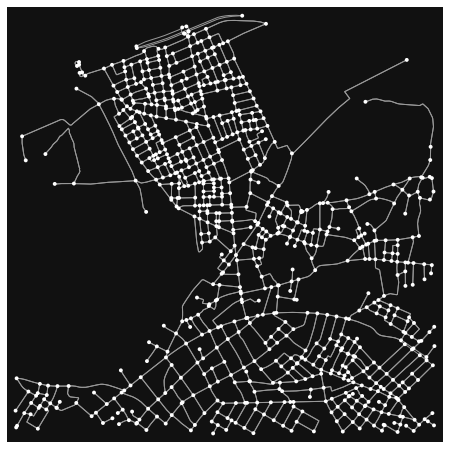

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [262]:
ox.plot_graph(g)

In [273]:
import descartes
import numpy as np

In [272]:
geom_schools.longitude = geom_schools.longitude.astype(np.float64)
geom_schools.latitude = geom_schools.latitude.astype(np.float64)

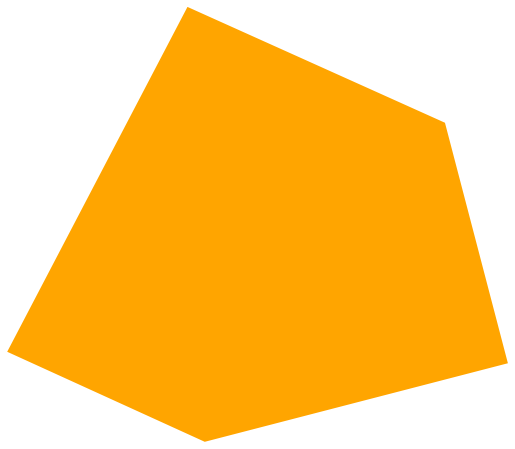

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [286]:
fig, ax = plt.subplots(figsize=(20,8))
ox.plot_footprints(city, ax=ax)
geom_schools.plot(ax=ax, linewidth = 1, edgecolor= 'b')